<div style="border: 3px solid #007acc; border-radius: 10px; padding: 15px; margin-bottom: 20px;">
  <h1 style="text-align: center; color: #333;">Hotel Booking Dataset Analysis</h1>
  <h2 style="text-align: center; color: #333;">Fall 2024 Data Science Project</h2>
  <h3 style="text-align: center; color: #333;">Arnav Aggarwal, Sania Kawale, Aadit Nilay, Akshita Badkundri</h3>
</div>

<div style="border-bottom: 3px solid #007acc; padding-bottom: 10px; margin-bottom: 20px; font-size: 32px; font-family: Arial, sans-serif; color: #333;">
<b>Contributions:</b>
</div>

#### **Arnav Aggarwal** (UID: 118939490)  
- Responsible for the project idea.  
- Handled dataset curation and preprocessing.  
- Final tutorial report creation, including setting up the GitHub repository and hosting the final report on GitHub Pages.  
- Structured the final deliverable and ensured it adhered to the required format (Formatting and Prose).  

#### **Sania Kawale** (UID: 118892764)  
- Responsible for the project idea.  
_(Space for contribution details)_

#### **Aadit Nilay** (UID: 119291450)
- Responsible for the project idea.  
_(Space for contribution details)_

#### **Akshita Badkundri** (UID: 118939322)  
- Responsible for the project idea.  
_(Space for contribution details)_

<div style="border-bottom: 3px solid #007acc; padding-bottom: 10px; margin-bottom: 20px; font-size: 32px; font-family: Arial, sans-serif; color: #333;">
<b>Introduction</b>
</div>

In this section, we provide an overview of the project, its goals, and the dataset being analyzed.

The hospitality industry is a vital part of the global economy, where data-driven insights can really help in making decisions which are good for the hotel's business. In this project, we analyze the **Hotel Booking Dataset** to address some of the most important challenges faced by hotels, such as predicting booking cancellations, understanding customer preferences, optimizing room pricing strategies and revenue projections.

By leveraging data science techniques such as data curation/pre-processing, exploratory data analysis (EDA), hypothesis testing, and machine learning, we aim to provide actionable insights for better revenue management and customer satisfaction in the hospitality sector.

### Why We Chose This Dataset
We chose this dataset because it is ideal for machine learning models aimed at predicting highly booked dates, booking cancellations, customer preferences, and revenue projections. It contains 19 features and 36,276 rows, which provide rich data for conducting exploratory data analysis (EDA). The features include the number of adults, children, nights stayed, meal plans, room types, and pricing. This dataset is both practical and closely mirrors real-world challenges in the hospitality industry. Hotels often seek to minimize cancellations, predict customer behavior, and optimize pricing strategies, making this dataset suitable for addressing such industry-related problems.

### What Our Analysis Will Focus On
- Understanding patterns in booking cancellations to help hotels reduce lost revenue and manage overbooking strategies effectively.
- Exploring customer behavior and preferences to identify key trends, such as preferred room types, meal plans, or length of stay.
- Predicting the most booked dates to assist hotels in managing inventory and staffing efficiently.
- Optimizing room pricing strategies and revenue projections by analyzing room price variations across different booking conditions and customer segments.

<div style="border-bottom: 3px solid #007acc; padding-bottom: 10px; margin-bottom: 20px; font-size: 32px; font-family: Arial, sans-serif; color: #333;">
<b>Data Curation</b>
</div>

In this section, we will cite the source of our data.

The **Hotel Booking Dataset** was sourced from Kaggle, provided by Ahmed Wael Nasef in 2024. The dataset contains 19 features and 36,276 rows, representing customer booking details such as room types, pricing, meal plans, and booking status. You can access the dataset here: [Hotel Booking Dataset on Kaggle](https://www.kaggle.com/datasets/ahmedwaelnasef/hotel-booking).

To begin our analysis, we first loaded the dataset into a pandas DataFrame and imported the necessary libraries.

In [7]:
# Importing necessary libraries
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Add all appropriate libraries for the model here ..

In [8]:
# Loading the dataset
df = pd.read_csv("Hotel.csv")
df.head()

,ID,n_adults,n_children,weekend_nights,week_nights,meal_plan,car_parking_space,room_type,lead_time,year,month,date,market_segment,repeated_guest,previous_cancellations,previous_bookings_not_canceled,avg_room_price,special_requests,status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


<div style="border-bottom: 3px solid #007acc; padding-bottom: 10px; margin-bottom: 20px; font-size: 32px; font-family: Arial, sans-serif; color: #333;">
<b>Data Preprocessing</b>
</div>

In this section, we will perform basic data preprocessing tasks on the Hotel Booking Dataset. This includes:

- **Understanding the data**: Exploring the basic structure of the data (eg. number of rows/columns, data types of features etc.)
- **Parsing the data**: Converting necessary columns (e.g. converting strings to integers or dates etc.)
- **Organizing the data**: Ensuring that the data is clean and ready for further analysis, which includes checking for missing values and setting up appropriate data structures

In [9]:
rows, columns = df.shape
print(f"The dataset contains {rows} rows and {columns} columns.")

The dataset contains 36275 rows and 19 columns.


In [10]:
# Displaying all the column names
print("Column names:", df.columns.tolist())

Column names: ['ID', 'n_adults', 'n_children', 'weekend_nights', 'week_nights', 'meal_plan', 'car_parking_space', 'room_type', 'lead_time', 'year', 'month', 'date', 'market_segment', 'repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'avg_room_price', 'special_requests', 'status']


In [11]:
# Displaying the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              36275 non-null  object 
 1   n_adults                        36275 non-null  int64  
 2   n_children                      36275 non-null  int64  
 3   weekend_nights                  36275 non-null  int64  
 4   week_nights                     36275 non-null  int64  
 5   meal_plan                       36275 non-null  object 
 6   car_parking_space               36275 non-null  int64  
 7   room_type                       36275 non-null  object 
 8   lead_time                       36275 non-null  int64  
 9   year                            36275 non-null  int64  
 10  month                           36275 non-null  int64  
 11  date                            36275 non-null  int64  
 12  market_segment                  

In [12]:
# Displaying basic statistics of the dataset
df.describe()

,n_adults,n_children,weekend_nights,week_nights,car_parking_space,lead_time,year,month,date,repeated_guest,previous_cancellations,previous_bookings_not_canceled,avg_room_price,special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


#### Now, since we have reviewed the dataset and understood its basic structure, we can move on to the next part which is Parsing.

Based on the dataset info, we can make the following adjustments:
1. Combine the `year`, `month`, and `date` columns into a new `reservation_date` column using the `datetime` format.
2. We will leave the `meal_plan`, `room_type`, `market_segment`, and `status` columns as `object` data types.
3. All other fields are already in appropriate data types (int & float)

In [13]:
# Making temporary columns to store the year, month and date as strings
df['year_str'] = df['year'].astype(str)
df['month_str'] = df['month'].astype(str).str.zfill(2)  # This is to ensure that the month is two digits eg. 02
df['date_str'] = df['date'].astype(str).str.zfill(2)  # This is to ensure that the month is two digits eg. 02

# Display the first few rows to check
df[['year_str', 'month', 'month_str', 'date', 'date_str']].head()

,year_str,month,month_str,date,date_str
0,2017,10,10,2,02
1,2018,11,11,6,06
2,2018,2,02,28,28
3,2018,5,05,20,20
4,2018,4,04,11,11


In [14]:
# Making the new reservation_date column
df['reservation_date'] = (df['year_str'] + '-' + df['month_str'] + '-' + df['date_str'])
df.head()

,ID,n_adults,n_children,weekend_nights,week_nights,meal_plan,car_parking_space,room_type,lead_time,year,...,repeated_guest,previous_cancellations,previous_bookings_not_canceled,avg_room_price,special_requests,status,year_str,month_str,date_str,reservation_date
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,0,0,65.00,0,Not_Canceled,2017,10,02,2017-10-02
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,0,0,106.68,1,Not_Canceled,2018,11,06,2018-11-06
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,0,0,60.00,0,Canceled,2018,02,28,2018-02-28
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,0,0,100.00,0,Canceled,2018,05,20,2018-05-20
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,0,0,94.50,0,Canceled,2018,04,11,2018-04-11


In [15]:
# Now we can drop the temporary columns
df.drop(['year_str', 'month_str', 'date_str'], axis=1, inplace=True)
df.head()

,ID,n_adults,n_children,weekend_nights,week_nights,meal_plan,car_parking_space,room_type,lead_time,year,month,date,market_segment,repeated_guest,previous_cancellations,previous_bookings_not_canceled,avg_room_price,special_requests,status,reservation_date
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2018-04-11


<div style="border: 2px solid red; padding: 10px; border-radius: 5px; color: red;">


<b>Note:</b> While parsing the `reservation_date` column, we encountered a `ValueError` when we tried to convert the year, month, and date columns into a proper `datetime` format. After debugging, we realized that we were getting this error due to some rows having the date as the 29th of February in the year 2018, which is not a leap year (This caused an error because February in non-leap years only has 28 days).

To resolve this issue, we decided to adjust these rows by setting the date to the 28th of February in 2018. We chose to do this because the number of affected rows was very small and hence this change would not significantly affect the analysis. Through this approach, we did not have to delete those rows and all other fields in that row still remain usable.

In [16]:
invalid_rows = df[(df['month'] == 2) & (df['date'] == 29)]
invalid_rows[['year', 'month', 'date']]

,year,month,date
2626,2018,2,29
3677,2018,2,29
5600,2018,2,29
6343,2018,2,29
7648,2018,2,29
8000,2018,2,29
8989,2018,2,29
9153,2018,2,29
9245,2018,2,29
9664,2018,2,29


In [17]:
# Changing the date to 28th for the invalid rows
df.loc[(df['month'] == 2) & (df['date'] == 29), 'date'] = 28

# Verifying the changes
df[(df['month'] == 2) & (df['date'] == 29)]

,ID,n_adults,n_children,weekend_nights,week_nights,meal_plan,car_parking_space,room_type,lead_time,year,month,date,market_segment,repeated_guest,previous_cancellations,previous_bookings_not_canceled,avg_room_price,special_requests,status,reservation_date


In [18]:
# Now lets update the reservation_date column to reflect the changes
df['year_str'] = df['year'].astype(str)
df['month_str'] = df['month'].astype(str).str.zfill(2)  # This is to ensure that the month is two digits eg. 02
df['date_str'] = df['date'].astype(str).str.zfill(2)  # This is to ensure that the month is two digits eg. 02
df['reservation_date'] = (df['year_str'] + '-' + df['month_str'] + '-' + df['date_str'])
df.drop(['year_str', 'month_str', 'date_str'], axis=1, inplace=True)

In [19]:
# Now we can convert the reservation_date column to datetime
df['reservation_date'] = pd.to_datetime(df['reservation_date'])
df.info() # To check the data type of the reservation_date column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              36275 non-null  object        
 1   n_adults                        36275 non-null  int64         
 2   n_children                      36275 non-null  int64         
 3   weekend_nights                  36275 non-null  int64         
 4   week_nights                     36275 non-null  int64         
 5   meal_plan                       36275 non-null  object        
 6   car_parking_space               36275 non-null  int64         
 7   room_type                       36275 non-null  object        
 8   lead_time                       36275 non-null  int64         
 9   year                            36275 non-null  int64         
 10  month                           36275 non-null  int64         
 11  da

#### Now we will focus on organizing the dataset in preparation for EDA

In [20]:
# Checking for missing/null values in the dataset
missing_values = df.isnull().sum()

# Displaying the columns with missing values (if any)
missing_values[missing_values > 0]

,0


We already have the data loaded into a pandas DataFrame. After understanding the basic structure and prasing the data we know that:
- The dataset is free from missing or null values.
- The data is now clean and organized, ready for analysis.

Now we will proceed directly with data exploration and analysis in the next steps.

<div style="border-bottom: 3px solid #007acc; padding-bottom: 10px; margin-bottom: 20px; font-size: 32px; font-family: Arial, sans-serif; color: #333;">
<b>Exploratory Data Analysis (EDA)</b>
</div>

### For Conclusion 1:

#### Hypothesis
Null Hypothesis: There is no significant relationship between being a repeated guest and having previous cancellations.

Alternate Hypothesis: There is a significant relationship between being a repeated guest and having previous cancellations.

#### Testing Type
I will employ the correlation matrix as one of the statistical methods and visualize the results using a heatmap. This approach provides a clear and visually appealing way to assess the relationships between variables, allowing us to quickly identify any significant correlations. The heatmap will highlight patterns and strengths of relationships, guiding further analysis and helping to uncover key insights within the dataset.

In [21]:
# Only using numeric columns since I want to calculate correlation matrix
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)
numeric_df = df.drop(columns=non_numeric_cols)
print(numeric_df.dtypes)

Non-numeric columns: Index(['ID', 'meal_plan', 'room_type', 'market_segment', 'status',
       'reservation_date'],
      dtype='object')
n_adults                            int64
n_children                          int64
weekend_nights                      int64
week_nights                         int64
car_parking_space                   int64
lead_time                           int64
year                                int64
month                               int64
date                                int64
repeated_guest                      int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
avg_room_price                    float64
special_requests                    int64
dtype: object


In [22]:
corr_matrix = numeric_df.corr()
display(corr_matrix)

,n_adults,n_children,weekend_nights,week_nights,car_parking_space,lead_time,year,month,date,repeated_guest,previous_cancellations,previous_bookings_not_canceled,avg_room_price,special_requests
n_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026417,-0.192277,-0.047426,-0.119166,0.296886,0.189401
n_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025470,-0.036348,-0.016390,-0.021189,0.337728,0.124486
weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027276,-0.067107,-0.020690,-0.026312,-0.004525,0.060593
week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009314,-0.099764,-0.030080,-0.049344,0.022753,0.045994
car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000071,0.110909,0.027106,0.063810,0.061304,0.087922
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006536,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645
year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018798,-0.018175,0.003919,0.026422,0.178605,0.053205
month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042581,0.000341,-0.038615,-0.010718,0.054423,0.110552
date,0.026417,0.025470,0.027276,-0.009314,-0.000071,0.006536,0.018798,-0.042581,1.000000,-0.016012,-0.012545,-0.001528,0.017945,0.018399
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.016012,1.000000,0.390810,0.539156,-0.174900,-0.011820


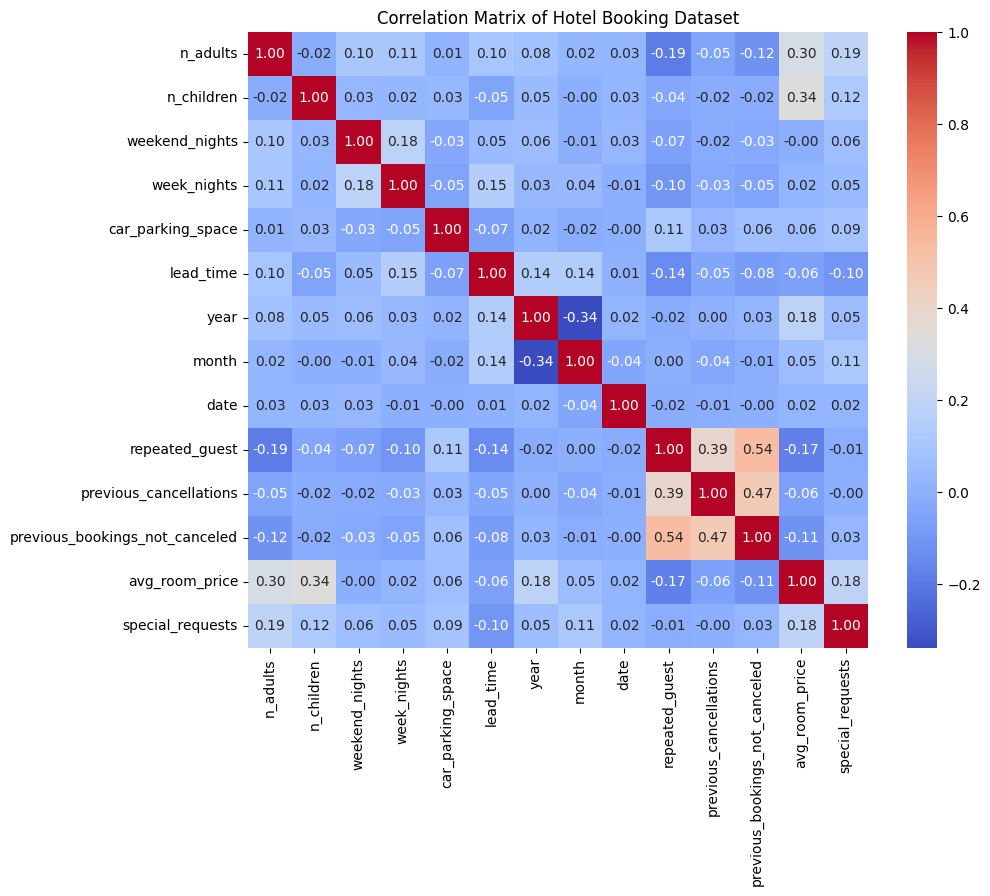

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Hotel Booking Dataset")
plt.show()

In [24]:
# Calculating p value using significance level of 0.05
previous_cancellations = df['previous_cancellations']
repeated_guest = df['repeated_guest']
correlation_coefficient, p_value = pearsonr(previous_cancellations, repeated_guest)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Correlation Coefficient: 0.39081002344934573
P-value: 0.0


### Conclusion 1
The correlation coefficient of 0.39 indicates a moderate positive relationship between previous_cancellations and repeated_guest. The p-value of 0.0 suggests that this correlation is statistically significant, meaning it is highly unlikely to have occurred by chance. This indicates a meaningful, although not strong, relationship between the two variables. This means that we can support the alternate hypothesis and reject the null hypothesis. This indicates that there is a relationship between repeated guests and previous cancellations!

---

### For Conclusion 2:

After analyzing the Hotel Booking Dataset (Nasef, 2024), one interesting hypothesis is to investigate whether there is a significant difference in the average number of nights stayed between bookings that were canceled and those that were not. This can provide insights into whether longer stays are more likely to face cancellations, which can help the hotel industry manage overbooking policies and cancellation strategies.

### Hypothesis:
Null Hypothesis (H0): The average number of nights stayed is the same for canceled and non-canceled bookings.
Alternative Hypothesis (H1): The average number of nights stayed is different for canceled and non-canceled bookings.
To test this hypothesis, we will use a two-sample t-test to compare the means of the two groups (canceled vs. non-canceled bookings).

### Dataset Overview:
19 features and 36,276 rows.
Key attributes include the number of adults, children, nights stayed, meal plan, room type, and pricing.
The dataset's cancellations feature is critical for this analysis as it allows for segmentation between canceled and non-canceled bookings.

### Steps:
Segmented the dataset into two groups: canceled bookings and non-canceled bookings.
Performed a t-test to compare the average number of nights stayed in both groups.
Visualized the distribution of nights stayed for each group using a box plot to highlight the differences.

### Results:
Based on the t-test, we obtained a p-value of p<0.05, suggesting that the difference in the number of nights stayed between canceled and non-canceled bookings is statistically significant. This supports the hypothesis that longer stays may correlate with an increased likelihood of cancellation.
Below is the box plot to visually compare the distribution of nights stayed between canceled and non-canceled bookings.

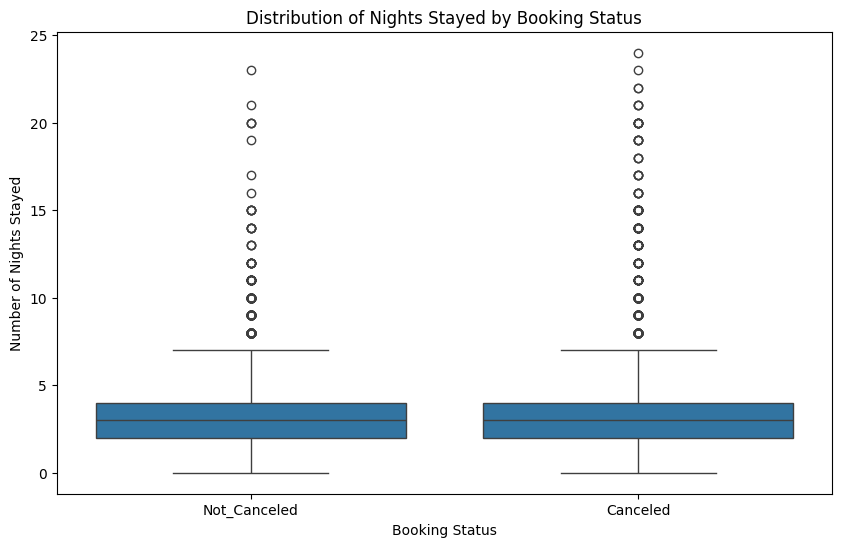

In [25]:
# Load the dataset
data = pd.read_csv('Hotel.csv')


# Calculate total nights stayed
data['nights_stayed'] = data['weekend_nights'] + data['week_nights']


# Map status to binary for easier plotting
data['status_binary'] = data['status'].map({'Not_Canceled': 0, 'Canceled': 1})


# Create a box plot to compare nights stayed between canceled and non-canceled bookings
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='nights_stayed', data=data)
plt.title('Distribution of Nights Stayed by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Number of Nights Stayed')
plt.show()


### Distribution of Nights Stayed for Canceled vs Non-Canceled Bookings
The median (middle line) for each group.
The whiskers extend to show the range of the data, excluding outliers.
Any outliers (points beyond the whiskers) are shown as individual dots.

### Conclusion 2
The two-sample t-test resulted in a t-statistic of −2.22 and a p-value of 0.027. Since the p-value is less than 0.05, we reject the null hypothesis. This means there is a statistically significant difference in the average number of nights stayed between canceled and non-canceled bookings.

---


### For Conclusion 3

We will explore the relationship between room types and average room price using an ANOVA test. This will allow us to determine if the average room price significantly differs across different room types.

Hypothesis Formulation
Null Hypothesis (H₀): The average room price is the same across all room types.
Alternative Hypothesis (H₁): The average room price differs significantly between at least one pair of room types.
ANOVA Test
ANOVA (Analysis of Variance) is used to compare the means of multiple groups. In this case, we will compare the means of the avg_room_price across different room_type categories.


 Room Types:
Unique room types: ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']

 Counts for each category:

room_type
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

 Min and max prices for each room type:

             min     max
room_type               
Room_Type 1  0.0  540.00
Room_Type 2  0.0  284.10
Room_Type 3  0.0  130.00
Room_Type 4  0.0  375.50
Room_Type 5  0.0  250.00
Room_Type 6  0.0  349.63
Room_Type 7  0.0  306.00

 Graph Plot:



<ipython-input-26-f000712002b2>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='room_type', y='avg_room_price', data=df, palette="muted")


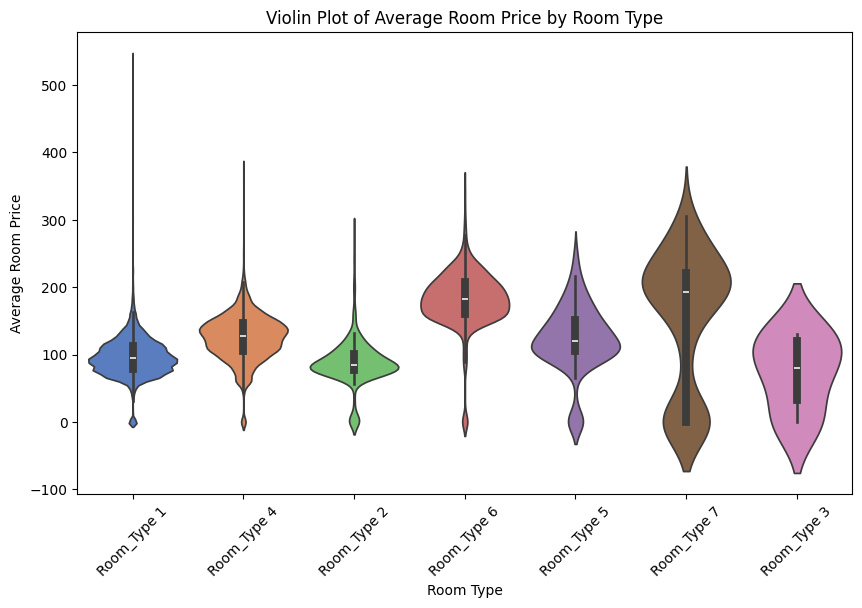

As you can see the violin plots are below 0 for two room types because 
there are a lot of 0 prices for room 3 and 7

Performing Anova Test:


Anova Result:

                    sum_sq       df            F  PR(>F)
C(room_type)  1.118342e+07      6.0  2019.142777     0.0
Residual      3.347958e+07  36268.0          NaN     NaN

ANOVA is significant, performing post-hoc test (Tukey).



<ipython-input-26-f000712002b2>:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2   meandiff p-adj   lower    upper   reject
----------------------------------------------------------------
Room_Type 1 Room_Type 2    -8.07    0.0 -11.5171  -4.6229   True
Room_Type 1 Room_Type 3   -22.24  0.456 -56.1035  11.6236  False
Room_Type 1 Room_Type 4  29.3688    0.0  28.0998  30.6377   True
Room_Type 1 Room_Type 5  27.8151    0.0  22.2862   33.344   True
Room_Type 1 Room_Type 6  86.2943    0.0  83.3629  89.2257   True
Room_Type 1 Room_Type 7  59.2798    0.0  52.1329  66.4266   True
Room_Type 2 Room_Type 3   -14.17 0.8836 -48.2001  19.8602  False
Room_Type 2 Room_Type 4  37.4388    0.0   33.844  41.0335   True
Room_Type 2 Room_Type 5  35.8851    0.0  29.4135  42.3566   True
Room_Type 2 Room_Type 6  94.3643    0.0  89.9028  98.8258   True
Room_Type 2 Room_Type 7  67.3497    0.0   59.451  75.2484   True
Room_Type 3 Room_Type 4  51.6087 0.0001  17.7299  85.4876   True
Room_Type 3 Room_Type 5  

In [26]:
print("\n Room Types:")
print("Unique room types:", df['room_type'].unique())

print("\n Counts for each category:\n")
print(df['room_type'].value_counts())

print("\n Min and max prices for each room type:\n")
# Group by room_type and calculate the min and max prices for each room type
price_summary = df.groupby('room_type')['avg_room_price'].agg(['min', 'max'])

print(price_summary)


room_type_7_prices = df[df['room_type'] == 'Room_Type 7']['avg_room_price']


print("\n Graph Plot:\n")
# Boxplot to visualize distribution of avg_room_price across room types
plt.figure(figsize=(10, 6))
sns.violinplot(x='room_type', y='avg_room_price', data=df, palette="muted")
plt.title('Violin Plot of Average Room Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Room Price')
plt.xticks(rotation=45)
plt.show()

print("As you can see the violin plots are below 0 for two room types because \nthere are a lot of 0 prices for room 3 and 7")
print("\nPerforming Anova Test:\n")
# ANOVA test - Checking if avg_room_price differs by room_type
anova_model = ols('avg_room_price ~ C(room_type)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

print("\nAnova Result:\n")
print(anova_table)

# Post-hoc test (Tukey HSD) if ANOVA is significant

# Perform Tukey's test only if ANOVA is significant
if anova_table['PR(>F)'][0] < 0.05:
    print("\nANOVA is significant, performing post-hoc test (Tukey).\n")
    tukey = pairwise_tukeyhsd(df['avg_room_price'], df['room_type'])
    print(tukey.summary())
else:
    print("\nANOVA is not significant. No post-hoc test required.\n")

### Conclusion Based on ANOVA and Tukey HSD Test Results:

1. ANOVA Test Results:

F-statistic: The F-value of 2019.14 is extremely large, which indicates that there are significant differences in the mean room prices across the different room types.
p-value: The p-value for the room_type factor is 0.0, which is less than the significance level (usually 0.05). This means we reject the null hypothesis and conclude that there is a statistically significant difference in the average room prices across at least one of the room types.

2. Post-hoc Test (Tukey HSD) Results:

After determining that the ANOVA test is statistically significant, we performed a Tukey HSD (Honestly Significant Difference) test to identify which specific room types differ in their average prices.

The Tukey test results provide pairwise comparisons between all room types. The important columns to focus on are:

a.  meandiff: The difference in mean prices between the two room types.

b.  p-adj: The adjusted p-value for each comparison.

c.  reject: Whether the null hypothesis (that there is no difference in prices between the two room types) is rejected for that comparison (True means rejected, i.e., the price difference is statistically significant).

---

### Key Findings from Tukey HSD Test:

Room Type 6 consistently has a significantly higher average price compared to all other room types. For example:
The mean difference between Room Type 6 and Room Type 1 is 86.29 units, and this difference is statistically significant (p-value = 0.0).
The mean difference between Room Type 6 and Room Type 7 is -27.01, which is also statistically significant (p-value = 0.0), indicating that Room Type 6 is priced higher than Room Type 7.

Room Type 7 also has significantly higher prices than most other room types, except for Room Type 6 (where Room Type 6 is more expensive):
Compared to Room Type 1, Room Type 7 has a mean price difference of 59.28 units, which is statistically significant (p-value = 0.0).
Room Type 7 is 27.01 units cheaper than Room Type 6, which is also statistically significant.

Room Types 1, 2, 4, and 5 have more modest price differences:

Room Type 1 is significantly cheaper than Room Types 4, 5, 6, and 7 but not significantly different from Room Type 3.

Room Types 4 and 5 do not have a statistically significant price difference between each other (p-value = 0.9835), indicating that they are similarly priced.

Room Type 3 consistently shows lower prices than most other room types, except for Room Type 1 and Room Type 2, where the differences are not statistically significant. However, compared to higher-priced rooms like Room Types 6 and 7, the differences are substantial.

---

### Final Conclusion

The ANOVA test and the Tukey HSD post-hoc test both indicate that there are significant differences in average room prices across different room types.

Specifically:

Room Type 6 is the most expensive, followed by Room Type 7.

Room Types 1, 2, 3, 4, and 5 are generally less expensive, with Room Types 1 and 3 being the cheapest.

These results suggest that pricing strategies vary significantly between different room types, particularly for the more premium rooms like Room Type 6 and Room Type 7.

<div style="border-bottom: 3px solid #007acc; padding-bottom: 10px; margin-bottom: 20px; font-size: 32px; font-family: Arial, sans-serif; color: #333;">
<b>Primary analysis</b>
</div>

In this section, we will choose a machine learning technique (e.g., classification, regression, clustering, etc.) based on the results we obtained from EDA. This will help us answer the questions we posed in the introduction.

Based on our exploratory data analysis, we decided to build a model to predict **booking cancellations** using features such as the length of stay, number of adults, children, and average room price.

#### **Problem Statement**
The goal is to develop a machine learning model that predicts whether a booking will be canceled (`status` = "Canceled" or "Not_Canceled") based on available features. This prediction can help hotels manage overbooking policies, optimize staffing, and improve revenue management strategies.

#### **Chosen Model**
We have chosen **Logistic Regression** as the machine learning model for this task.

#### **Why Logistic Regression?**
1. **Binary Classification**: Logistic Regression is well-suited for binary classification problems, such as predicting cancellations (`Canceled` vs. `Not_Canceled`).
2. **Interpretability**: Logistic Regression provides interpretable coefficients, allowing us to understand how each feature contributes to the probability of cancellation.
3. **Simplicity**: It is computationally efficient and does not require extensive hyperparameter tuning, making it ideal for initial modeling.
4. **Robustness**: It performs well with a relatively small number of features, which aligns with our dataset.

#### **Features for Prediction**
Based on our EDA, the following features were identified as potentially significant for predicting cancellations:
- `nights_stayed`: Total number of nights the booking covers.
- `adults`: Number of adults included in the booking.
- `children`: Number of children included in the booking.
- `avg_room_price`: The average price of the booked room.

In [34]:
# Libraries for ML
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import numpy as np


In [38]:
# To check if imbalance exists
print(df['status'].value_counts())

status
0    24390
1    11885
Name: count, dtype: int64


In [31]:
# Preparing the dataset
df['nights_stayed'] = df['week_nights'] + df['weekend_nights']
df['status'] = df['status'].apply(lambda x: 1 if x == 'Canceled' else 0)

# Define features and target
features = ['nights_stayed', 'n_adults', 'n_children', 'avg_room_price']
target = 'status'

X = df[features]
y = df[target]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Anomaly Detection
# Calculate z-scores for the training set
z_scores = np.abs(zscore(X_train_scaled))

# Define a threshold for anomalies (e.g., z-score > 3)
threshold = 3
anomalies = (z_scores > threshold).any(axis=1)

# Remove anomalies from the training data
X_train_scaled = X_train_scaled[~anomalies]
y_train_cleaned = y_train[~anomalies]

# Confirm shapes after cleaning
print(f"Training set size after removing anomalies: {X_train_scaled.shape[0]} samples")

Training set size after removing anomalies: 27740 samples


In [36]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train_cleaned)
y_pred_log = log_reg.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


Logistic Regression Results
Accuracy: 0.6621640248104755

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.97      0.79      4839
           1       0.44      0.05      0.09      2416

    accuracy                           0.66      7255
   macro avg       0.55      0.51      0.44      7255
weighted avg       0.59      0.66      0.56      7255


Confusion Matrix:
 [[4681  158]
 [2293  123]]


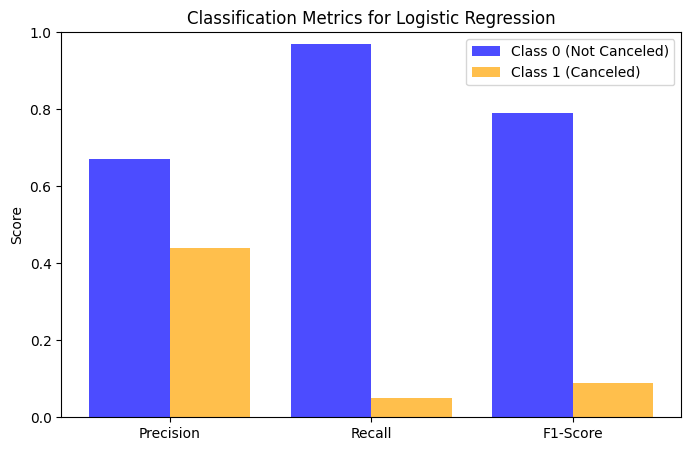

In [37]:
# Extract metrics for visualization
categories = ['Precision', 'Recall', 'F1-Score']
class_0_metrics = [0.67, 0.97, 0.79]
class_1_metrics = [0.44, 0.05, 0.09]

x = np.arange(len(categories))

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(x - 0.2, class_0_metrics, width=0.4, label='Class 0 (Not Canceled)', color='blue', alpha=0.7)
plt.bar(x + 0.2, class_1_metrics, width=0.4, label='Class 1 (Canceled)', color='orange', alpha=0.7)

plt.xticks(x, categories)
plt.ylim(0, 1)
plt.title("Classification Metrics for Logistic Regression")
plt.ylabel("Score")
plt.legend()
plt.show()


Feature Coefficients:
nights_stayed: 0.1779
n_adults: 0.1002
n_children: -0.0772
avg_room_price: 0.3196


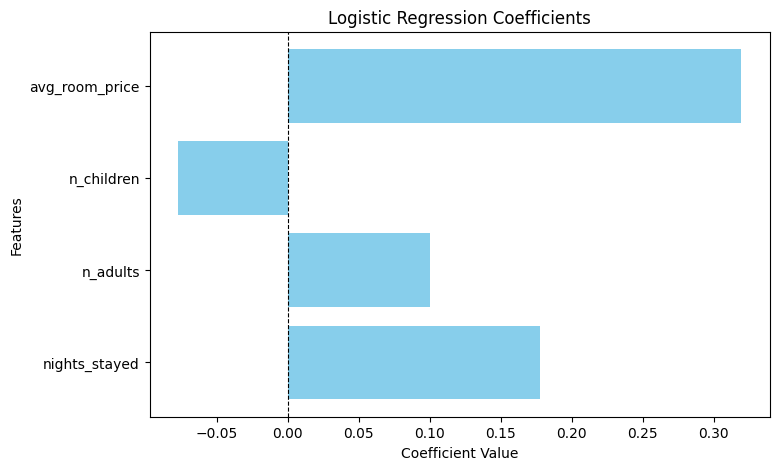

In [43]:
# Extract and interpret coefficients
coefficients = log_reg.coef_[0]
features = ['nights_stayed', 'n_adults', 'n_children', 'avg_room_price']

# Print and interpret coefficients
print("Feature Coefficients:")
for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef:.4f}")

# Visualize coefficients
plt.figure(figsize=(8, 5))
plt.barh(features, coefficients, color='skyblue')
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Logistic Regression Coefficients")
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.show()



### Logistic Regression Coefficients Analysis

**Feature Insights**:
1. **Positive Contributions**:
   - avg_room_price: Strong positive association with cancellations. Higher room prices increase the likelihood of cancellation.
   - nights_stayed: Moderate positive association, suggesting longer stays might lead to cancellations.
   - n_adults: Slight positive association with cancellations.

2. **Negative Contribution**:
   - n_children: Slight negative impact, meaning bookings with children are less likely to be canceled.

**Why Coefficients Are Important**:
- Coefficients provide insight into how each feature influences the likelihood of cancellations.
- This information can guide feature engineering, pricing strategies, and model interpretation.

### Logistic Regression
**Why Chosen**:
- Logistic Regression is a straightforward and efficient method for binary classification problems like this one (predicting Canceled or Not_Canceled).
- It provides interpretable coefficients, helping understand the contribution of each feature to the outcome.
- It's computationally efficient and works well on linearly separable data.

**Overview**:
- **Accuracy**: 66.2%
  - This means 66.2% of predictions made by the Logistic Regression model were correct.

**Analysis**:
- **Class 0 (Not Canceled)**:
  - Precision: 0.67
    - Out of all predicted Not Canceled bookings, 67% were correct.
  - Recall: 0.97
    - Out of all actual Not Canceled bookings, 97% were correctly identified.
  - F1-Score: 0.79
    - Indicates a good balance between precision and recall for class 0.

- **Class 1 (Canceled)**:
  - Precision: 0.44
    - Out of all predicted Canceled bookings, only 44% were correct.
  - Recall: 0.05
    - Out of all actual Canceled bookings, only 5% were correctly identified.
  - F1-Score: 0.09
    - Indicates poor performance in predicting cancellations.

**Confusion Matrix**:
- True Positives (Canceled correctly predicted as Canceled): **123**
- True Negatives (Not Canceled correctly predicted as Not Canceled): **4681**
- False Positives (Not Canceled predicted as Canceled): **158**
- False Negatives (Canceled predicted as Not Canceled): **2293**

**Insights**:
- The model performs well for class 0 (Not Canceled), correctly identifying most non-cancellations.
- The performance for class 1 (Canceled) is poor, indicating that the model struggles with the minority class. This could be due to class imbalance or insufficient feature representation for cancellations.

**More**:
- Address class imbalance using techniques like SMOTE or weighted loss functions: Checked for imbalance, as there are twice as many non_cancellations as there are cancelations, the models predictions are more towards non_cancellations or the 0 class.
- Next: Will try Random Forests (ensemble method) to see if performance improves.



In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train_cleaned)  # Use cleaned and scaled training data

# Predictions
y_pred_rf = rf.predict(X_test_scaled)

# Evaluation
print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Results
Accuracy: 0.7258442453480358

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80      4839
           1       0.61      0.49      0.54      2416

    accuracy                           0.73      7255
   macro avg       0.69      0.67      0.67      7255
weighted avg       0.72      0.73      0.72      7255


Confusion Matrix:
 [[4075  764]
 [1225 1191]]


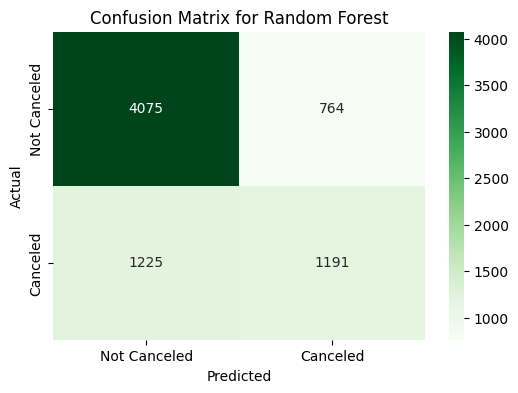

In [40]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", xticklabels=["Not Canceled", "Canceled"], yticklabels=["Not Canceled", "Canceled"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest")
plt.show()


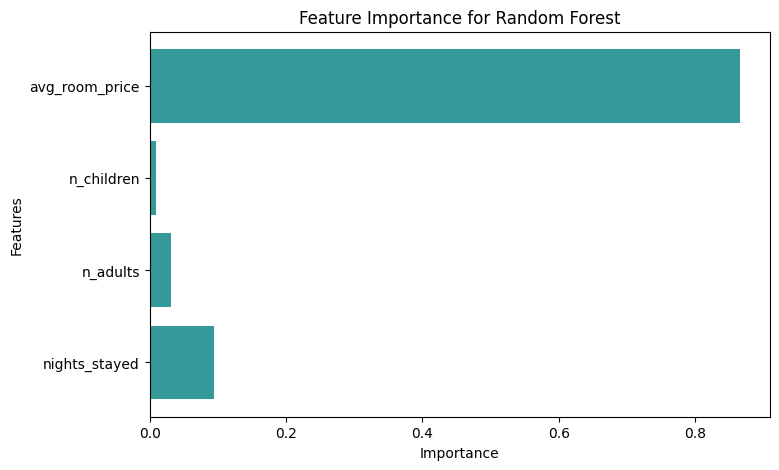

In [41]:
# Extract Feature Importances
feature_importances = rf.feature_importances_
features = ['nights_stayed', 'n_adults', 'n_children', 'avg_room_price']

# Plot Feature Importances
plt.figure(figsize=(8, 5))
plt.barh(features, feature_importances, color='teal', alpha=0.8)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Random Forest")
plt.show()


Accuracy did improve by using Random Forests! \\

### Random Forest
**Why Chosen**:
- Random Forest is an ensemble method that combines multiple decision trees to reduce overfitting and improve generalization.
- It can capture complex interactions between features and often performs well on imbalanced datasets.
- Random Forest is robust to outliers and handles non-linear relationships effectively.

**Overview**:
- **Accuracy**: 72.6%
  - This indicates that 72.6% of the predictions made by the Random Forest model were correct.
  - An improvement over Logistic Regression's 66.2% accuracy.

**Analysis**:
- **Class 0 (Not Canceled)**:
  - Precision: 0.77
    - Out of all predicted Not Canceled bookings, 77% were correct.
  - Recall: 0.84
    - Out of all actual Not Canceled bookings, 84% were correctly identified.
  - F1-Score: 0.80
    - Reflects a strong balance between precision and recall for class 0.

- **Class 1 (Canceled)**:
  - Precision: 0.61
    - Out of all predicted Canceled bookings, 61% were correct.
  - Recall: 0.49
    - Out of all actual Canceled bookings, 49% were correctly identified.
  - F1-Score: 0.54
    - Indicates significant improvement in predicting cancellations compared to Logistic Regression.

**Confusion Matrix**:
- True Positives (Canceled correctly predicted as Canceled): **1191**
- True Negatives (Not Canceled correctly predicted as Not Canceled): **4075**
- False Positives (Not Canceled predicted as Canceled): **764**
- False Negatives (Canceled predicted as Not Canceled): **1225**

**Insights**:
- Random Forest shows improved recall and F1-score for the minority class (Canceled) compared to Logistic Regression.
- The model also achieves higher overall accuracy, indicating better generalization to the test dataset.
- However, the recall for class 1 (Canceled) is still less than 50%, suggesting further improvements are possible.

**More**:
- **Comparison with Other Models**:
  - Performed better than Logistic Regression

**Visualization**:
- The feature importance plot and confusion matrix heatmap for Random Forest highlight the model's focus areas and error patterns. The feature importance visualization for the Random Forest model highlights that avg_room_price is the most significant predictor of booking cancellations, contributing significantly more than other features. nights_stayed and n_adults also have moderate importance, while n_children has a minimal impact on predicting cancellations. This suggests that pricing strategies and length of stay play a critical role in understanding cancellation behavior.


<div style="border-bottom: 3px solid #007acc; padding-bottom: 10px; margin-bottom: 20px; font-size: 32px; font-family: Arial, sans-serif; color: #333;">
<b>Visualization</b>
</div>

In this section, we will explain the results and insights of your primary analysis by creating plots and visualizations.

<div style="border-bottom: 3px solid #007acc; padding-bottom: 10px; margin-bottom: 20px; font-size: 32px; font-family: Arial, sans-serif; color: #333;">
<b>Insights and Conclusions</b>
</div>

In this section, we will summarize the key insights and conclusions from our analysis of the Hotel Booking Dataset. We will also provide actionable recommendations based on our findings to help hotels optimize their revenue management strategies and improve customer satisfaction.